# Task №1:

#1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:

- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;

#2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;

#3. Plot precision-recall and ROC curves for your models.


#4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.

-----

In [1]:
# Importing the necessary libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Data import:

df = pd.read_csv("bioresponse.csv")
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Checking for empty values - no empty values found:

df.isnull().sum(axis = 0).sum()

0

In [35]:
# Checking for class imbalance - the dataset is fairly balanced:

df['Activity'].value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

# 1. Training 4 different classifiers using sklearn library to predict "Activity":

In [3]:
# Separating data into testing and training samples

training_threshold = int(len(df) * 0.8)

x_train, y_train = df[df.columns[1:]][:training_threshold], df[df.columns[0]][:training_threshold]
x_test, y_test = df[df.columns[1:]][training_threshold:], df[df.columns[0]][training_threshold:]

In [4]:
# Training models and computing predictions:

models_names_arr = ['small_tree', 'deep_tree', 'small_rf', 'deep_rf']
models_dict, prob_pred_dict = {}, {}

i = 0
for model in [DecisionTreeClassifier, RandomForestClassifier]:
    for depth in [5, 20]:
        
        clf = model(max_depth = depth, random_state = 7)
        clf = clf.fit(x_train, y_train)
        
        model_name = models_names_arr[i]
        models_dict[model_name] = clf
        prob_pred_dict[model_name] = clf.predict_proba(x_test)[:, 1]

        i += 1

models_dict

{'small_tree': DecisionTreeClassifier(max_depth=5, random_state=7),
 'deep_tree': DecisionTreeClassifier(max_depth=20, random_state=7),
 'small_rf': RandomForestClassifier(max_depth=5, random_state=7),
 'deep_rf': RandomForestClassifier(max_depth=20, random_state=7)}

In [5]:
prob_pred_dict['real_activity'] = y_test
prob_pred_df = pd.DataFrame(prob_pred_dict)
prob_pred_df

,small_tree,deep_tree,small_rf,deep_rf,real_activity
3000,0.131621,0.051163,0.365613,0.197577,0
3001,0.000000,0.000000,0.438206,0.384429,0
3002,0.654891,1.000000,0.725028,0.837362,1
3003,0.290909,0.000000,0.299192,0.300000,0
3004,0.883901,0.000000,0.834265,0.859667,1
...,...,...,...,...,...
3746,0.810304,0.968000,0.638273,0.804183,1
3747,0.846939,1.000000,0.571642,0.628164,1
3748,0.290909,1.000000,0.374817,0.390000,0
3749,0.654891,1.000000,0.564965,0.834444,1


# 2. Calculating the metrics to check the quality of the models:

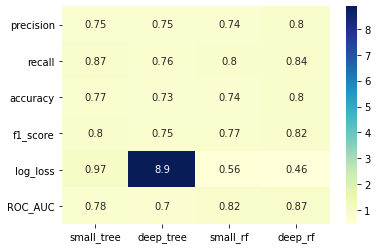

In [6]:
from collections import defaultdict

metrics_dict = defaultdict(dict)
threshold = 0.5

for name in models_names_arr:
    
    # Forming predicted class:
    predicted_class = (prob_pred_df[name] > threshold).astype(int)
    
    # Computing all metrics:
    precision, recall, f_score, _ = metrics.precision_recall_fscore_support(prob_pred_df['real_activity'],\
                                                                            predicted_class, average = 'binary')
    accuracy = metrics.accuracy_score(prob_pred_df['real_activity'], predicted_class)
    log_loss = metrics.log_loss(prob_pred_df['real_activity'], prob_pred_df[name])
    roc_auc = metrics.roc_auc_score(prob_pred_df['real_activity'], prob_pred_df[name])

    metric_name_value_pairs = zip(('precision', 'recall', 'accuracy', 'f1_score', 'log_loss', 'ROC_AUC'),\
                                  (precision, recall, accuracy, f_score, log_loss, roc_auc))
    
    # Building metrics dict:
    for metric_name, metric_value in metric_name_value_pairs:
        metrics_dict[name][metric_name] = metric_value

df_metrics = pd.DataFrame(metrics_dict)
sns.heatmap(df_metrics, cmap = 'YlGnBu', annot=True);


The table shows that:

- the deep_tree model was retrained, because it gives worse results than small_tree.

- the deep_rf model works well and shows higher performance than small_rf.

# 3. Ploting precision-recall and ROC curves for the models:


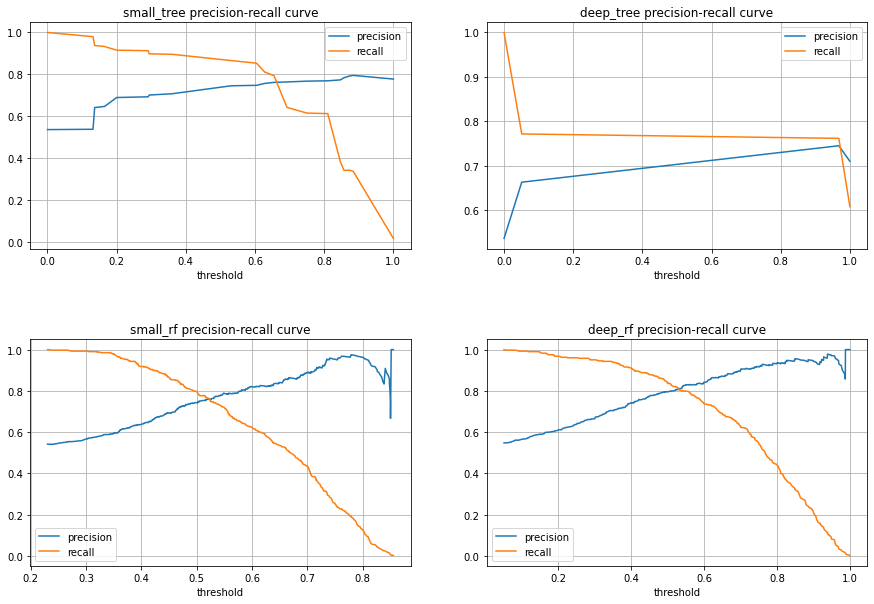

In [7]:
fig = plt.subplots(figsize = (15, 10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)


for i, name in enumerate(models_names_arr):
    
    precision, recall, threshold = metrics.precision_recall_curve(prob_pred_df['real_activity'],  prob_pred_df[name])
    plt.subplot(2, 2, i + 1)
    plt.plot(threshold, precision[:-1], label = 'precision')
    plt.plot(threshold, recall[:-1], label = 'recall')
    
    plt.xlabel('threshold')
    plt.title(f'{name} precision-recall curve')
    plt.legend()
    plt.grid()

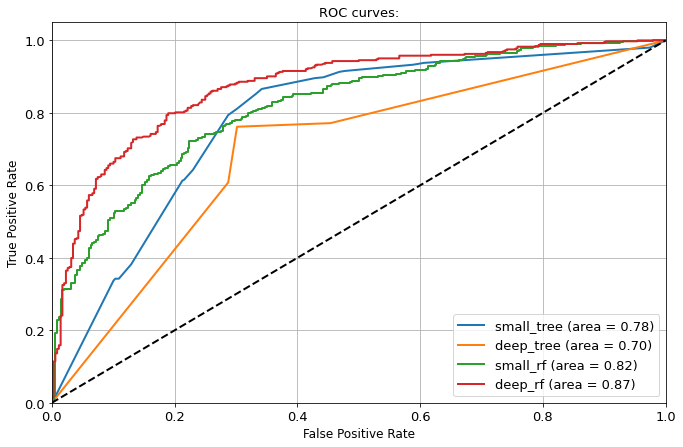

In [8]:
fig = plt.subplots(figsize = (11, 7))

for name in models_names_arr:
    
    fpr, tpr, _ = metrics.roc_curve(prob_pred_df['real_activity'], prob_pred_df[name])
    roc_auc = metrics.roc_auc_score(prob_pred_df['real_activity'], prob_pred_df[name])
    plt.plot(fpr, tpr, lw = 2, label = f"{name} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)

plt.title('ROC curves:', fontsize = 13)
plt.legend(loc = 'best', fontsize = 13)
plt.grid()
plt.show()

# 4. Training a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it:

1    2034
0    1717
Name: Activity, dtype: int64

In [33]:
# The "class_weight" attribute has been added, for balances the class weights. As a result, recall reached its maximum.

forest_avoid_fn = RandomForestClassifier(max_depth = 15, class_weight = {0: 1, 1: 10}, random_state = 7)
forest_avoid_fn = forest_avoid_fn.fit(x_train, y_train)

prob_pred_avoid_fn = {}
prob_pred_avoid_fn['forest_avoid_fn'] = forest_avoid_fn.predict_proba(x_test)[:, 1]
prob_pred_avoid_fn['real_activity'] = y_test
prob_pred_avoid_fn_df = pd.DataFrame(prob_pred_avoid_fn)
prob_pred_avoid_fn_df

,forest_avoid_fn,real_activity
3000,0.711360,0
3001,0.737173,0
3002,0.960362,1
3003,0.143325,0
3004,0.941604,1
...,...,...
3746,0.900251,1
3747,0.830808,1
3748,0.404958,0
3749,0.908306,1


In [34]:
predicted_avoid_fn_class = forest_avoid_fn.predict(x_test)

print('precision = {precision:.3f}; \nrecall = {recall:.3f}; \naccuracy = {accuracy:.3f}; \nf1 = {f1:.3f}; \nlog_loss = {log_loss:.3f}'.format(
            precision = metrics.precision_score(prob_pred_avoid_fn['real_activity'], predicted_avoid_fn_class),
            recall = metrics.recall_score(prob_pred_avoid_fn['real_activity'], predicted_avoid_fn_class),
            accuracy = metrics.accuracy_score(prob_pred_avoid_fn['real_activity'], predicted_avoid_fn_class),
            f1 = metrics.f1_score(prob_pred_avoid_fn['real_activity'], predicted_avoid_fn_class),
            log_loss = metrics.log_loss(prob_pred_avoid_fn['real_activity'], predicted_avoid_fn_class))
     )

precision = 0.635; 
recall = 0.963; 
accuracy = 0.683; 
f1 = 0.765; 
log_loss = 10.946


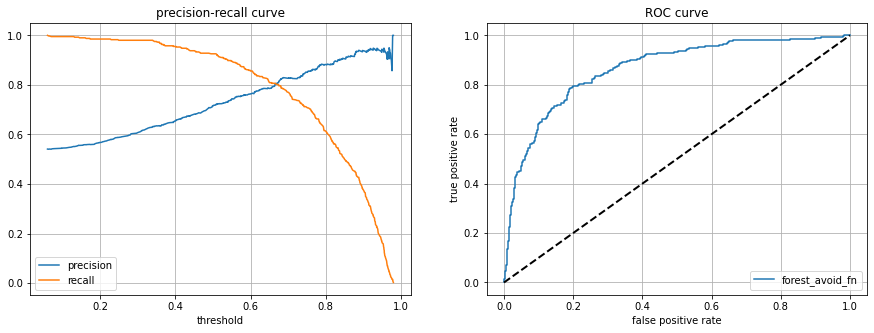

In [18]:
fig, (ax_pr, ax_roc) = plt.subplots(1, 2, figsize = (15, 5))

fpr, tpr, thr = metrics.roc_curve(prob_pred_avoid_fn_df['real_activity'],  prob_pred_avoid_fn_df['forest_avoid_fn'])
precision, recall, threshold = metrics.precision_recall_curve(prob_pred_avoid_fn_df['real_activity'], \
                                                              prob_pred_avoid_fn_df['forest_avoid_fn'])

ax_pr.plot(threshold, precision[:-1], label = 'precision')
ax_pr.plot(threshold, recall[:-1], label = 'recall')
ax_pr.set_xlabel('threshold')
ax_pr.set_title('precision-recall curve')
ax_pr.legend()
ax_pr.grid()

plt.plot(fpr, tpr, label = 'forest_avoid_fn')
plt.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')
ax_roc.set_xlabel('false positive rate')
ax_roc.set_ylabel('true positive rate')
ax_roc.set_title('ROC curve')
ax_roc.legend(loc = 4)
ax_roc.grid()